In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [15]:
data_path = "../data/processed/flight_data_clean.csv"
flight_data = pd.read_csv(data_path)

flight_data.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,delayed,dep_hour,day_of_week,MONTH,DAY_OF_WEEK
0,2022-07-29,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,4742,SNA,"Santa Ana, CA",LAS,"Las Vegas, NV",...,NaN,NaN,NaN,NaN,NaN,0,6,4,7,5
1,2021-10-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,924,SLC,"Salt Lake City, UT",MSP,"Minneapolis, MN",...,NaN,NaN,NaN,NaN,NaN,0,17,0,10,1
2,2021-07-29,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,105,LAS,"Las Vegas, NV",BUR,"Burbank, CA",...,NaN,NaN,NaN,NaN,NaN,0,6,3,7,4
3,2022-06-24,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3842,OMA,"Omaha, NE",DTW,"Detroit, MI",...,NaN,NaN,NaN,NaN,NaN,0,10,4,6,5
4,2023-06-03,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5048,LAR,"Laramie, WY",DEN,"Denver, CO",...,NaN,NaN,NaN,NaN,NaN,0,18,5,6,6


In [28]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FL_DATE                  100000 non-null  datetime64[ns]
 1   AIRLINE                  100000 non-null  object        
 2   AIRLINE_DOT              100000 non-null  object        
 3   AIRLINE_CODE             100000 non-null  object        
 4   DOT_CODE                 100000 non-null  int64         
 5   FL_NUMBER                100000 non-null  int64         
 6   ORIGIN                   100000 non-null  object        
 7   ORIGIN_CITY              100000 non-null  object        
 8   DEST                     100000 non-null  object        
 9   DEST_CITY                100000 non-null  object        
 10  CRS_DEP_TIME             100000 non-null  int64         
 11  DEP_TIME                 97962 non-null   float64       
 12  CRS_ARR_TIME     

In [40]:
delay_counts = flight_data["delayed"].value_counts(normalize = True)
delay_counts

delayed
0    0.80293
1    0.19707
Name: proportion, dtype: float64

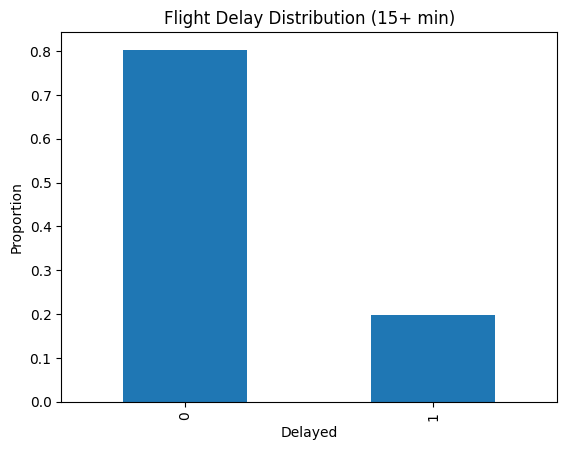

In [51]:
delay_counts.plot(kind="bar")
plt.title("Flight Delay Distribution (15+ min)")
plt.xlabel("Delayed")
plt.ylabel("Proportion")
plt.show()

In [61]:
airline_delay_rate = (
    flight_data
    .groupby("AIRLINE")["delayed"]
    .mean()
    .sort_values(ascending=False)
)

airline_delay_rate.head(10)

AIRLINE
Frontier Airlines Inc.    0.300173
JetBlue Airways           0.286054
Allegiant Air             0.270121
Spirit Air Lines          0.250146
Southwest Airlines Co.    0.230938
American Airlines Inc.    0.208484
United Air Lines Inc.     0.202414
Mesa Airlines Inc.        0.194212
Hawaiian Airlines Inc.    0.193340
Alaska Airlines Inc.      0.187424
Name: delayed, dtype: float64

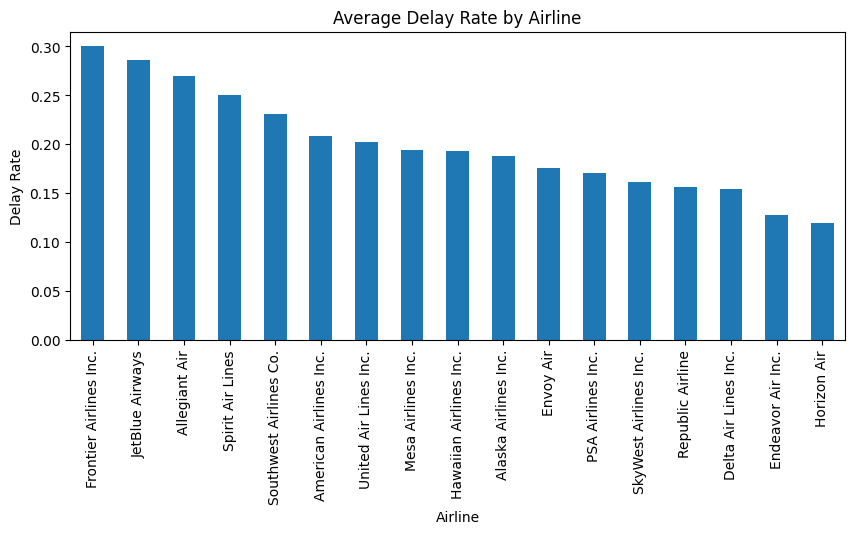

In [70]:
airline_delay_rate.plot(kind="bar", figsize=(10, 4))
plt.title("Average Delay Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Delay Rate")
plt.show()

In [78]:
#Extract hour from departure
flight_data["dep_hour"] = flight_data["CRS_DEP_TIME"] // 100

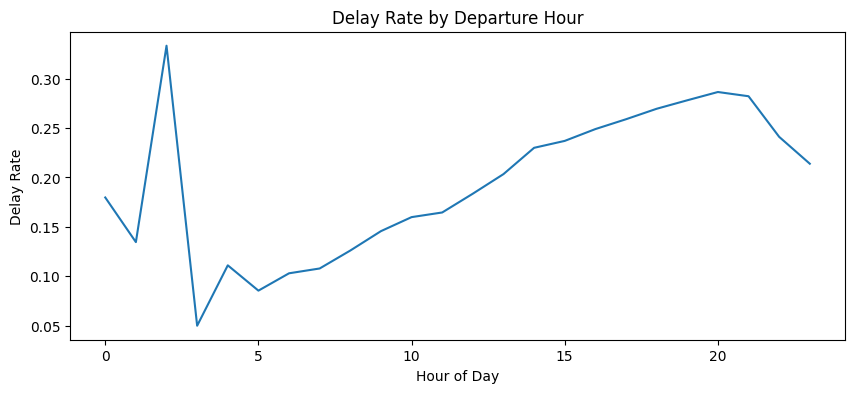

In [85]:
hourly_delay = flight_data.groupby("dep_hour")["delayed"].mean()

hourly_delay.plot(figsize=(10, 4))
plt.title("Delay Rate by Departure Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Delay Rate")
plt.show()

In [96]:
flight_data["FL_DATE"] = pd.to_datetime(flight_data["FL_DATE"])

flight_data["DAY_OF_WEEK"] = flight_data["FL_DATE"].dt.dayofweek

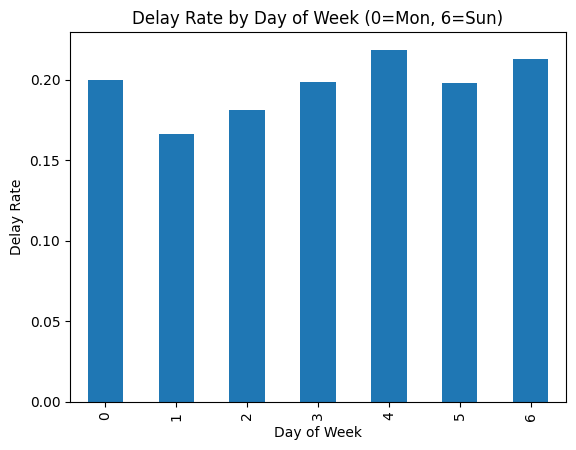

In [128]:
weekly_delay = flight_data.groupby("DAY_OF_WEEK")["delayed"].mean()

weekly_delay.plot(kind="bar")
plt.title("Delay Rate by Day of Week (0=Mon, 6=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Delay Rate")
plt.show()

In [129]:
flight_data.isnull().mean().sort_values(ascending=False).head(10)

CANCELLATION_CODE          0.97916
DELAY_DUE_LATE_AIRCRAFT    0.80293
DELAY_DUE_SECURITY         0.80293
DELAY_DUE_NAS              0.80293
DELAY_DUE_WEATHER          0.80293
DELAY_DUE_CARRIER          0.80293
ELAPSED_TIME               0.02331
ARR_TIME                   0.02104
DEP_TIME                   0.02038
CRS_ELAPSED_TIME           0.00000
dtype: float64

In [130]:
processed_path = "../data/processed/flight_data_clean.csv"
flight_data.to_csv(processed_path, index=False)

print("Clean dataset saved successfully.")

Clean dataset saved successfully.


In [131]:
from preprocessing import (
    prepare_features,
    build_preprocessing_pipeline,
    split_data
)

flight_data = pd.read_csv("../data/processed/flight_data_clean.csv")

flight_data["FL_DATE"] = pd.to_datetime(flight_data["FL_DATE"])
flight_data["MONTH"] = flight_data["FL_DATE"].dt.month

In [132]:
X, y = prepare_features(flight_data)

X.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,dep_hour,day_of_week,MONTH,DAY_OF_WEEK
0,2022-07-29,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,4742,SNA,"Santa Ana, CA",LAS,"Las Vegas, NV",...,226.0,NaN,NaN,NaN,NaN,NaN,6,4,7,4
1,2021-10-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,924,SLC,"Salt Lake City, UT",MSP,"Minneapolis, MN",...,991.0,NaN,NaN,NaN,NaN,NaN,17,0,10,0
2,2021-07-29,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,105,LAS,"Las Vegas, NV",BUR,"Burbank, CA",...,223.0,NaN,NaN,NaN,NaN,NaN,6,3,7,3
3,2022-06-24,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3842,OMA,"Omaha, NE",DTW,"Detroit, MI",...,651.0,NaN,NaN,NaN,NaN,NaN,10,4,6,4
4,2023-06-03,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5048,LAR,"Laramie, WY",DEN,"Denver, CO",...,113.0,NaN,NaN,NaN,NaN,NaN,18,5,6,5


In [133]:
X_train, X_test, y_train, y_test = split_data(X, y)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (80000, 27)
Test size: (20000, 27)


In [134]:
preprocessor = build_preprocessing_pipeline()

preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [139]:
import sys
sys.path.append("../src")

from train import(
    train_logistic_regression,
    train_random_forest,
    train_gradient_boosting
)

In [142]:
log_reg_model = train_logistic_regression(preprocessor)
rf_model = train_random_forest(preprocessor)
gb_model = train_gradient_boosting(preprocessor)

In [143]:
log_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

print("All models trained successfully.")

ValueError: A given column is not a column of the dataframe

In [144]:
flight_data.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'delayed', 'dep_hour',
       'day_of_week', 'MONTH', 'DAY_OF_WEEK'],
      dtype='object')